## Intro

As I am sure it does for many, the word "abstract" makes me think of abstract art, such as that made by Picasso (the only abstract artist I know). 

I have downloaded (from https://www.kaggle.com/momanyc/museum-collection/version/1?select=artworks.csv) a dataset describing all artworks in the Museum of Modern Art (MoMA). 

According to https://artincontext.org/abstract-artists/, the top 10 most famous abstract artists are: 
* Wassily Kandinsky (1866 – 1944)
* Piet Mondrian (1872 – 1944)
* Kazimir Malevich (1878 – 1935)
* Georgia O’Keeffe (1887 – 1986)
* Mark Rothko (1903 – 1966)
* Clyfford Still (1904 – 1980)
* Willem de Kooning (1904 – 1997)
* Franz Kline (1910 – 1962)
* Jackson Pollock (1912 – 1956)
* Helen Frankenthaler (1928 – 2011)

__I would like to visualize two distributions describing how many paintings in the MoMA these artists have contributed.__ 


## Imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [8]:
# get the data
data = pd.read_csv("artworks.csv")
data

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,...,Architecture,885.1996,NaN,NaN,48.6000,NaN,168.9000,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,...,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,1.1997,NaN,NaN,34.3000,NaN,31.8000,NaN,NaN,NaN
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,...,Architecture,2.1995,NaN,NaN,50.8000,NaN,50.8000,NaN,NaN,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,...,Architecture,2.1997,NaN,NaN,38.4000,NaN,19.1000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130257,217983,Seul/NY/MAX,4469,Nam June Paik,NaN,VHS,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5038,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN
130258,217984,Fluxus-Manifestatie in en Rond Kunsthandel Monet,NaN,NaN,1962,VHS,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5039,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN
130259,217985,Fluxphone Compositions,67695,Ely Ramen,1969,Cassette,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5040,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN
130260,217986,Unidentified,NaN,NaN,NaN,Cassette,NaN,2008-10-08,The Gilbert and Lila Silverman Fluxus Collecti...,N,...,Media,FC5041,NaN,NaN,0.0000,NaN,0.0000,0.0,NaN,NaN


In [9]:
# modify the data: we only need the 10 abstract artists
artistlist = ["Wassily Kandinsky", "Piet Mondrian", "Kazimir Malevich", "Georgia O’Keeffe", "Mark Rothko", "Clyfford Still", "Willem de Kooning", "Franz Kline", "Jackson Pollock", "Helen Frankenthaler"]
absdata = data[data["Name"].isin(artistlist)]
absdata 

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
7321,8398,de Kooning,3213,Willem de Kooning,1965,Lithograph,"29 x 20"" (73.6 x 50.8 cm)",1965-11-09,Gift of the Aspen Institute for Humanistic Stu...,Y,...,Design,933.1965,NaN,NaN,73.600000,NaN,50.800000,NaN,NaN,NaN
7911,8988,Paris Review,1974,Helen Frankenthaler,1967,Lithograph,"31 x 23"" (78.7 x 58.4 cm)",1967-10-18,"Gift of Page, Arbitrio and Resen",Y,...,Design,2285.1967,NaN,NaN,78.700000,NaN,58.400000,NaN,NaN,NaN
7990,9069,Untitled (Suprematist Cross),3710,Kazimir Malevich,"1920, printed 1973",Linoleum cut,"sheet: 12 3/8 x 10 1/8"" (31.4 x 25.7 cm)",2001-01-24,Gift of The Judith Rothschild Foundation,Y,...,Print,3.2001,NaN,NaN,31.400000,NaN,25.700000,NaN,NaN,NaN
8082,9162,Vil'gel'mova Karusel' (Wilhelm's Carousel),3710,Kazimir Malevich,1914,Lithograph,"composition: 14 1/4 × 20 15/16"" (36.2 × 53.2 c...",2001-01-24,Gift of The Judith Rothschild Foundation,Y,...,Print,14.2001,NaN,NaN,36.200000,NaN,53.200000,NaN,NaN,NaN
8921,10001,Plate (folio 2) from (POEMS),3213,Willem de Kooning,1967-1988,NaN,"irreg. composition 12 1/4 x 9 5/8"" (31.2 x 24...",1990-01-16,Gift of Benjamin Shiff,N,...,Illustrated Book,28.1990.1,NaN,NaN,31.200000,NaN,24.500000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126134,198698,Postcard (Addressed to A.F. Del Marle),4057,Piet Mondrian,1926–1927,Ink on paper,"3 1/2 × 5 3/8"" (8.9 × 13.7 cm)",2015-10-19,"Elaine Lustig Cohen Collection, Gift of Lawren...",N,...,Design,1297.2015.1-4,NaN,NaN,8.890018,NaN,13.652527,NaN,NaN,NaN
129271,207104,Postcard (Addressed to A.F. Del Marle),4057,Piet Mondrian,1926,Ink on paper,"3 1/2 × 5 3/8"" (8.9 × 13.7 cm)",2015-10-19,"Elaine Lustig Cohen Collection, gift of Lawren...",Y,...,Design,1297.2015.1,NaN,NaN,8.890018,NaN,13.652527,NaN,NaN,NaN
129272,207105,Postcard (Addressed to A.F. Del Marle),4057,Piet Mondrian,1926,Ink on paper,"3 1/2 × 5 3/8"" (8.9 × 13.7 cm)",2015-10-19,"Elaine Lustig Cohen Collection, gift of Lawren...",Y,...,Design,1297.2015.2,NaN,NaN,8.890018,NaN,13.652527,NaN,NaN,NaN
129273,207106,Postcard (Addressed to A.F. Del Marle),4057,Piet Mondrian,1927,Ink on paper,"3 1/2 × 5 3/8"" (8.9 × 13.7 cm)",2015-10-19,"Elaine Lustig Cohen Collection, gift of Lawren...",Y,...,Design,1297.2015.3,NaN,NaN,8.890018,NaN,13.652527,NaN,NaN,NaN


In [10]:
absdata["Name"].value_counts().shape

(8,)

In [11]:
absdata["Name"].unique().shape

(8,)

## Plot

__The visualization can be accomplished using a bar graph and a pie chart (I've heard that you don't really like pie charts, and I apologize if that is the case!).__
* The bar graph can simply depict the number of paintings each artist in the list of 10 has contributed to the MoMA. 
* The pie chart can show the percentage of the total paintings in the MoMA comprised of the artworks fromo the top 10 artists. 

I suspect that the percentage of total paintings in the MoMA taken up by the works of the top 10 artists will be very small. This isn't because I think the artists are unproductive or hesitant to share their paintings with museums- I simply believe that the Museum of Modern Art, a world-renowned museum, has a huge number of artworks. To contribute even a tenth of a percent of all the artworks in such a large museum is a feat in itself! 

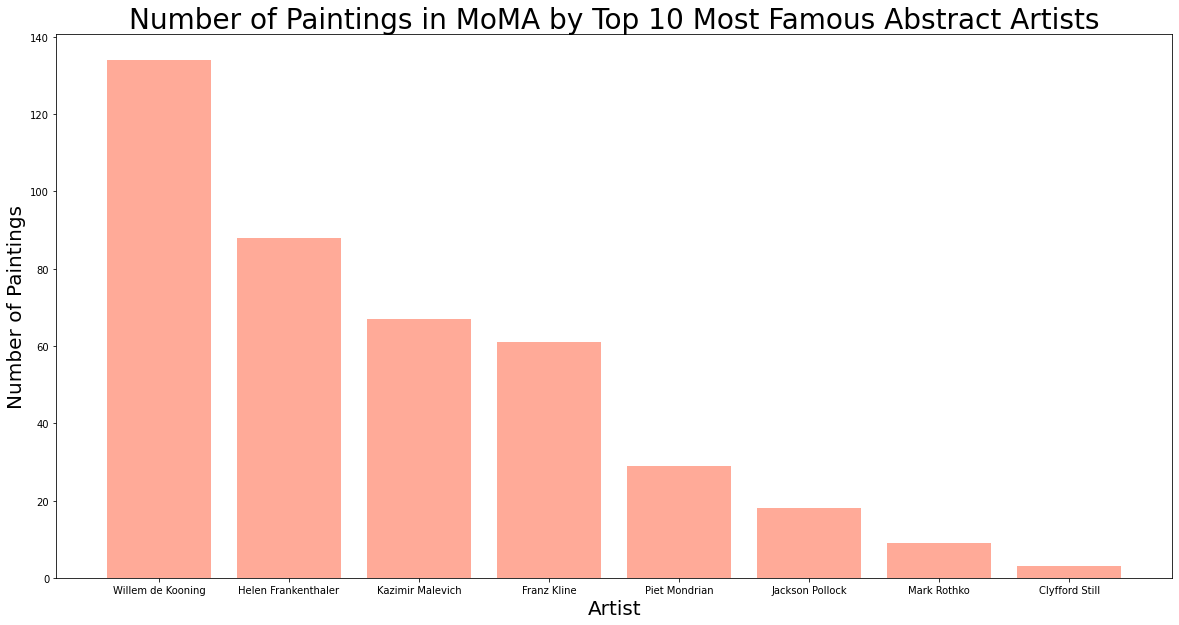

In [14]:
# 1) Bar graph depicting num. works by artist
# plot
plt.figure(figsize = (20,10))

plt.xlabel(xlabel="Artist", fontsize=20)
plt.ylabel(ylabel="Number of Paintings", fontsize=20)
plt.title(label="Number of Paintings in MoMA by Top 10 Most Famous Abstract Artists", fontsize=28) # a mouthful

plt.bar(x = absdata["Name"].unique(), 
        height = absdata["Name"].value_counts(),
        color = "#FF5733",
        alpha = 0.5)


plt.show()

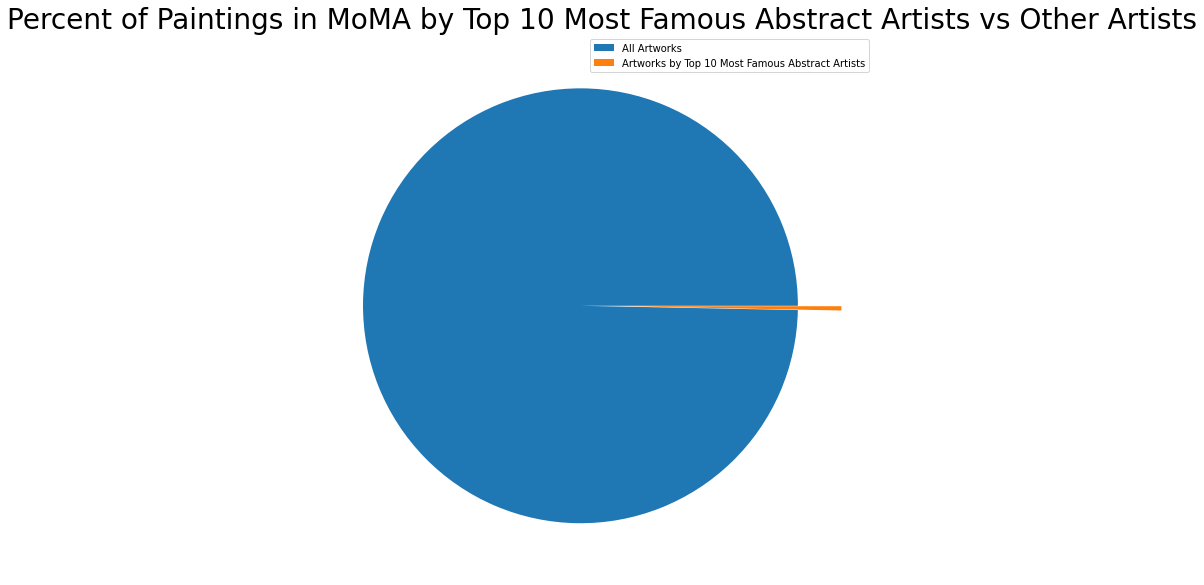

In [15]:
# 2) Pie Chart Showing Percent of All MoMA Art Composed of Top 10 Abstract Artists' Paintings
plt.figure(figsize = (20,10))

plt.title(label="Percent of Paintings in MoMA by Top 10 Most Famous Abstract Artists vs Other Artists", fontsize=28) 

plt.pie(x=[len(data), len(absdata)], explode = [0.1, 0.1])
plt.legend(["All Artworks", "Artworks by Top 10 Most Famous Abstract Artists"])
plt.show()

In [16]:
# how many of the paintins in the MOMA are made by the top 10 most famous abstract artists? 
print(len(absdata) / len(data))

0.003139825889361441


As it turns out, these artists only contribute 0.3 % of all artwork in the MoMA. Still, the MoMA contains a gargantuan amount of art, so this is still an accomplishment for the artists. 